# <div style="text-align: center"> Robustness and fairness</div>
#### <div style="text-align: right"> Prof. Changho Suh, TA Jaewoong Cho, Gyeongjo Hwang</div>

# 1. Data poisoning and robust machine learning

**실습목표**
- Clean dataset과 Poisoned dataset을 인위적으로 생성한다. 
- 각각의 dataset에 logistic regression을 적용한 뒤 성능을 측정하고, poisoning 정도에 따라 성능 저하를 확인한다. 
- poisoning data에 robust한 Learn to Reweight 알고리즘을 구현한다.
- Poisoned dataset에 Learn to Reweight 기반 logistic regression을 적용한 뒤 성능을 측정하고, poisoning 정도에 따라 성능 저하를 확인한다. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from robust_utils import generate_normal, plot, Logistic_regression, draw_boundary, sigmoid
from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (12, 8)

## 1-A. Clean dataset 및 Poisoned dataset 생성

**실습:**

- 두 가우시안 확률 분포로 부터 synthetic data 생성하고 plotting 하기 
- 주어진 데이터의 label을 flip 시켜서 poisoned data 생성하고 plotting. 

### 1. clean dataset을 생성하고 plotting하기

<img src="figures/hynix_figure1.png" style="width:900px;height:300px;" >

In [6]:
def Normalize(data):
    return (data - data.mean()) / data.std()

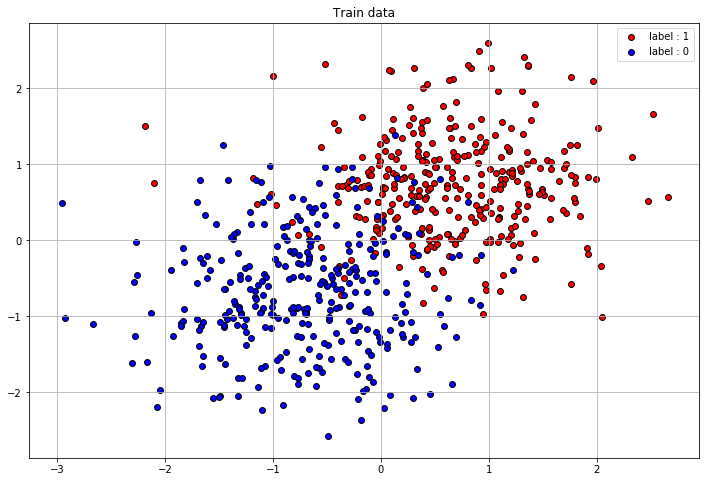

In [34]:
#정규분포를 따르는 clean synthetic data 생성
(X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = generate_normal(n_samples=1000, val_portion=0.2)
X_train = Normalize(X_train)
plot(X_train, Y_train)

### 2. clean dataset과 poison rate이 주어졌을 때 해당 portion만큼 label을 flip하는 함수를 구현하기
<img src="figures/hynix_figure2.png" style="width:900px;height:300px;" >

In [36]:
def simple_poison(X, Y, poison_rate):
    
    n_of_poison = int((X.shape[1]) * poison_rate) #number of poisoned data
    Y_copy = np.copy(Y) #input으로 받은 Y값 copy한 변수 
    if n_of_poison !=0:
        Y_copy[-n_of_poison:] = 1 - Y_copy[-n_of_poison:] #"n_of_poison" 개수 만큼 label flipping 하기 

    return X, Y_copy

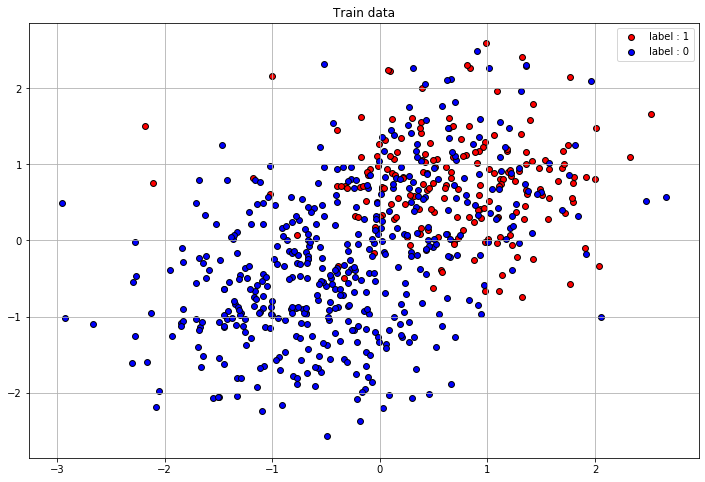

In [35]:
# Poisoned data 생성 및 plotting
X_train = Normalize(X_train) #data normalization
X_train, Y_train_poison = simple_poison(X_train, Y_train, 0.2) #poisoned data 생성
plot(X_train, Y_train_poison) #plotting

## 1-B. 데이터에 logistic regression을 적용하여 성능 측정하기 

**실습:**

- Poison rate을 아래와 같이 변화시키며 logistic regression 성능 측정하기

### 1. Clean dataset에서의 logistic regression 성능 측정


train accuracy: 92.0 %
test accuracy: 94.5 %


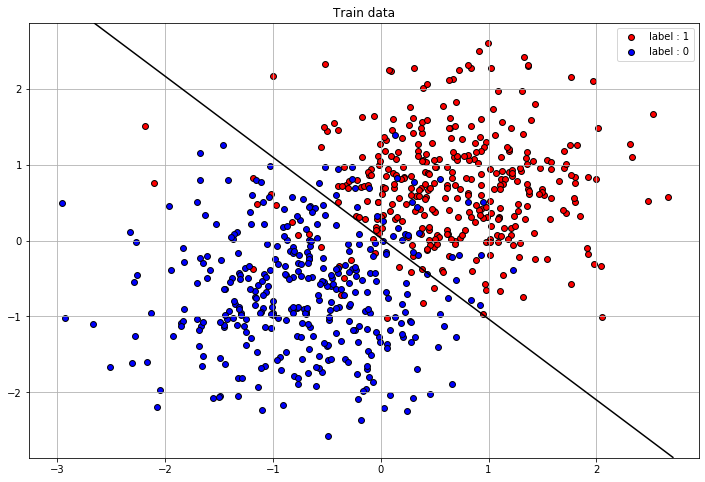

In [37]:
# Clean dataset에서의 logistic regression 성능 측정 
(X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = generate_normal(n_samples=1000, val_portion=0.125)
X_train, X_test  = Normalize(X_train), Normalize(X_test)
d = Logistic_regression(X_train, Y_train, X_test, Y_test, learning_rate=0.01, num_iterations=5000)
draw_boundary(d['w'], d['b'], X_train, Y_train)

### 2. Poisoned dataset에서의 logistic regression 성능 측정


In [38]:
#poisoned dataset logistic regression 성능 측정하기 
poison_rate = np.linspace(0, 0.49, 20) #0~0.49 사이를 20 구간으로 나누기 
accuracies = []
 
for pr in poison_rate:
    (X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = generate_normal(n_samples=1000, val_portion=0.125) # clean data 생성
    X_train, Y_train_poison = simple_poison(X_train, Y_train, pr) # poisoned data 생성
    X_train, X_val, X_test = Normalize(X_train), Normalize(X_val), Normalize(X_test) #data normalization
    d = Logistic_regression(X_train, Y_train_poison, X_test, Y_test, learning_rate=0.01, num_iterations=20000) #logistic regression 실행
    accuracies.append(d['test_acc']) 


train accuracy: 92.0 %
test accuracy: 93.5 %



train accuracy: 89.28571428571429 %
test accuracy: 93.0 %



train accuracy: 87.57142857142857 %
test accuracy: 92.5 %



train accuracy: 84.85714285714286 %
test accuracy: 91.5 %



train accuracy: 83.14285714285714 %
test accuracy: 88.5 %



train accuracy: 78.85714285714286 %
test accuracy: 85.0 %



train accuracy: 77.28571428571428 %
test accuracy: 80.0 %



train accuracy: 76.14285714285714 %
test accuracy: 76.0 %



train accuracy: 74.14285714285714 %
test accuracy: 71.0 %



train accuracy: 74.28571428571429 %
test accuracy: 67.0 %



train accuracy: 76.14285714285714 %
test accuracy: 64.5 %



train accuracy: 76.42857142857143 %
test accuracy: 63.0 %



train accuracy: 78.71428571428572 %
test accuracy: 56.0 %



train accuracy: 82.14285714285714 %
test accuracy: 54.0 %



train accuracy: 85.28571428571429 %
test accuracy: 52.5 %



train accuracy: 88.0 %
test accuracy: 51.0 %



train accuracy: 91.14285714285714 %
test accuracy: 50.0 %



train accuracy: 93.71428571428571 %
test accuracy: 50.0 %



train accuracy: 96.28571428571429 %
test accuracy: 50.0 %



train accuracy: 99.0 %
test accuracy: 50.0 %


### 3. Poison rate vs. test accuracy plotting

Text(0, 0.5, 'test accuracy')

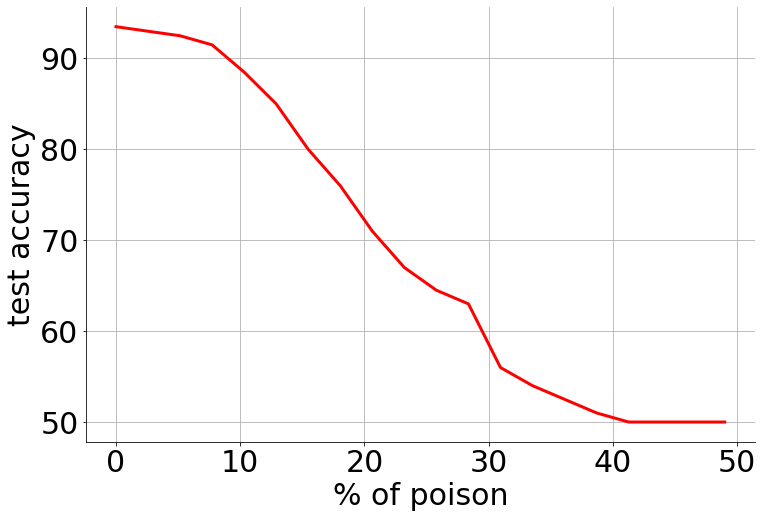

In [39]:
# 각 poison_rate 별 logistic regression 성능 측정
plt.plot(poison_rate*100, accuracies, 'r-', linewidth=3)
axes = plt.gca()
axes.tick_params(axis="x", labelsize=30)
axes.tick_params(axis="y", labelsize=30)
axes.spines["right"].set_visible(False)
axes.spines["top"].set_visible(False)
plt.grid(True)
plt.xlabel('% of poison', fontsize=30)
plt.ylabel('test accuracy', fontsize=30)

## 1-C. Learn to reweight 알고리즘 구현 및 성능 검증

실습: 
- Learn to reweight 알고리즘 구현하기 
- poison rate에 따른 Learn to reweight 알고리즘 적용 전 후 logistic regression 성능 비교하기 
- 각 data point별 mu 값 visualization하기 
- validation dataset size에 따른 알고리즘 성능 검증하기

### 1. 알고리즘 구현 

In [12]:
def initialize_weights(dim, n_train):
    # Return a vector of shape (dim,1) "w", 
    #a scalar value "b", and a vector of shape (n_train, 1) "mu" from the “standard normal” distribution.
    np.random.seed(0)
    
    w = np.random.randn(dim, 1)
    b = np.random.randn(1).item()
    mu = np.random.randn(n_train, 1)

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    assert(mu.shape == (n_train, 1))
    
    return w, b, mu 

def forward(w, b, X, Y):
    
    Yhat = sigmoid(np.dot(w.T, X) + b)
    
    return Yhat

def backward_mu(w, b, X_train, Y_train, X_val, Y_val, Yhat_t, Yhat_v, alpha):
    
    dmu = - alpha * (Yhat_t - Y_train).T * X_train.T@X_val@(Yhat_v - Y_val).T
    
    return dmu

def backward_params(w, b, mu, X, Y, Yhat):

    dw = np.dot(X, mu * ((Yhat - Y).T))
    db = np.dot((Yhat - Y), mu)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    grads = {"dw": dw,
                  "db": db}
    
    return grads

def fit(w, b, mu, X_train, Y_train, X_val, Y_val, num_iterations, alpha, beta, print_cost=False):
    
    costs = []
    batch_size = X_val.shape[1]
    
    for i in tqdm_notebook(range(num_iterations)):
        Yhat_t = forward(w, b, X_train, Y_train)
        grads = backward_params(w, b, mu, X_train, Y_train, Yhat_t)

        dw = grads["dw"]
        db = grads["db"]
        
        #weight update

        w = w - alpha * dw  
        b = b - alpha * db
        
        Yhat_v = forward(w, b, X_val, Y_val)
        
        # mu update
        dmu = backward_mu(w, b, X_train, Y_train, X_val, Y_val, Yhat_t, Yhat_v, alpha)
        mu = mu - beta*dmu
        mu = np.maximum(0, mu)
        if np.sum(mu) != 0:
            mu = mu / np.sum(mu)
    
    params = {"w": w,
                     "b": b,
                     "mu":mu}
    
    grads = {"dw": dw,
                  "db": db,
                  "dmu": dmu}
    
    return params, grads, costs

def predict(w, b, X):
    
    m = X.shape[1]
    assert(w.shape[0] == X.shape[0])
    
    Yhat = sigmoid(np.dot(w.T, X) + b)
    Yhat[Yhat > 0.5] = 1
    Yhat[Yhat <= 0.5] = 0
    Y_prediction = Yhat
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

def robust_train(X_train, Y_train, X_val, Y_val, X_test, Y_test, num_iterations=2000, alpha=0.5, beta=0.5, print_cost=False):
    # initialize parameters with standard normal distribution 
    w, b, mu = initialize_weights(X_train.shape[0], X_train.shape[1])
    
    # Gradient descent 
    parameters, grads, costs = fit(w, b, mu, X_train, Y_train, X_val, Y_val, num_iterations, alpha, beta, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    mu = parameters["mu"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    train_acc = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_acc = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    print("train accuracy: {} %".format(train_acc))
    print("test accuracy: {} %".format(test_acc))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "num_iterations": num_iterations,
         "train_acc":train_acc,
         "test_acc":test_acc,
         "mu": mu,}
    
    return d

### 2. poison rate에 따른 Learn to reweight 알고리즘 적용 전 후 logistic regression 성능 비교하기 

In [13]:
model_history = []
poison_rate = np.linspace(0, 0.49, 20)
accuracies_l2w = []

val_portion = 0.125 

for pr in poison_rate:
    (X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = generate_normal(n_samples=1000, val_portion=val_portion)
    X_train, X_val, X_test = Normalize(X_train), Normalize(X_val), Normalize(X_test)
    X_train, Y_train_poison = simple_poison(X_train, Y_train, pr)
    d = robust_train(X_train, Y_train_poison, X_val, Y_val, X_test, Y_test, alpha=0.001, beta=0.001, num_iterations=30000)
    accuracies_l2w.append(d['test_acc'])
    model_history.append(d)


train accuracy: 91.57142857142857 %
test accuracy: 94.5 %



train accuracy: 89.0 %
test accuracy: 94.5 %



train accuracy: 87.42857142857143 %
test accuracy: 94.5 %



train accuracy: 84.85714285714286 %
test accuracy: 94.5 %



train accuracy: 83.42857142857143 %
test accuracy: 94.5 %



train accuracy: 81.14285714285714 %
test accuracy: 94.0 %



train accuracy: 78.85714285714286 %
test accuracy: 94.0 %



train accuracy: 77.14285714285714 %
test accuracy: 93.5 %



train accuracy: 74.71428571428572 %
test accuracy: 93.0 %



train accuracy: 72.42857142857143 %
test accuracy: 93.0 %



train accuracy: 70.57142857142857 %
test accuracy: 93.0 %



train accuracy: 69.0 %
test accuracy: 92.5 %



train accuracy: 66.85714285714286 %
test accuracy: 92.5 %



train accuracy: 65.28571428571428 %
test accuracy: 92.5 %



train accuracy: 63.285714285714285 %
test accuracy: 93.0 %



train accuracy: 61.42857142857142 %
test accuracy: 93.0 %



train accuracy: 60.0 %
test accuracy: 93.0 %



train accuracy: 57.714285714285715 %
test accuracy: 93.0 %



train accuracy: 57.142857142857146 %
test accuracy: 91.5 %



train accuracy: 59.0 %
test accuracy: 89.0 %


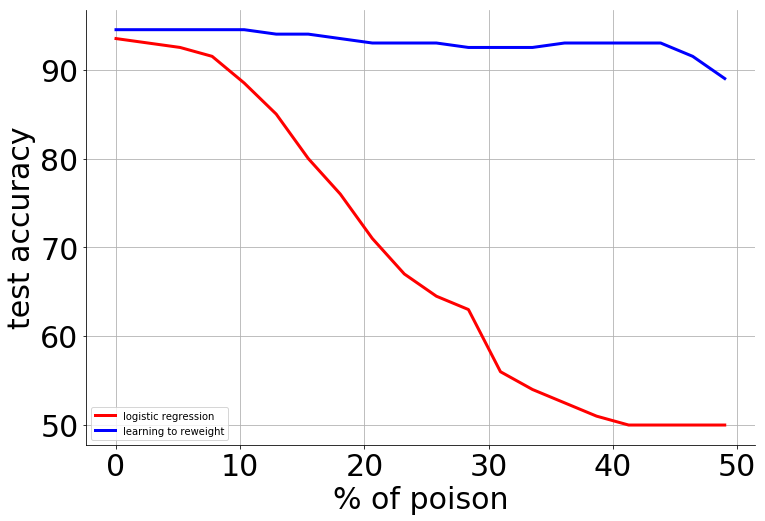

In [14]:
plt.plot(poison_rate*100, accuracies, 'r-', label = 'logistic regression', linewidth=3)
plt.plot(poison_rate*100, accuracies_l2w,'b-', label = 'learning to reweight', linewidth=3)

axes = plt.gca()
axes.tick_params(axis="x", labelsize=30)
axes.tick_params(axis="y", labelsize=30)
axes.spines["right"].set_visible(False)
axes.spines["top"].set_visible(False)
plt.grid(True)
plt.xlabel('% of poison', fontsize=30)
plt.ylabel('test accuracy', fontsize=30)
plt.legend()

### 3. 각 data point별 weight visualization하기 



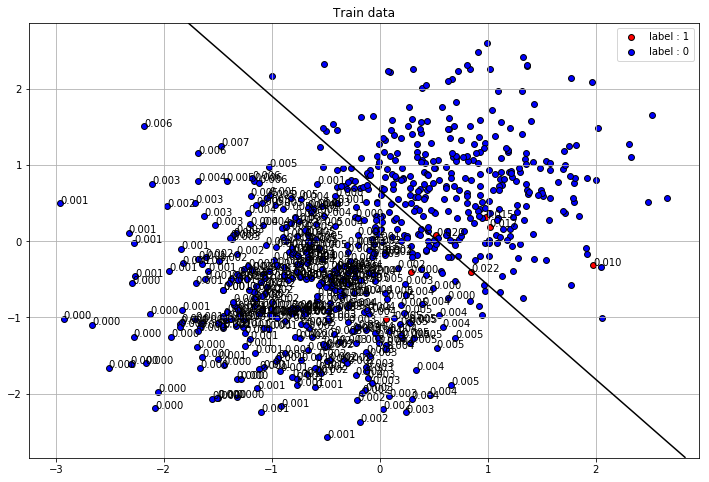

In [16]:
# 해당 poison_rate에서 각 data 별 mu 값 visualization 하기 
idx = -1
(X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = generate_normal(n_samples=1000, val_portion=0.125)
X_train, X_val, X_test = Normalize(X_train), Normalize(X_val), Normalize(X_test)
X_train, Y_train_poison = simple_poison(X_train, Y_train, poison_rate[idx])

d = model_history[idx]
draw_boundary(d['w'], d['b'], X_train, Y_train_poison)

ax = plt.gca()
x = X_train[0, :]
y = X_train[1, :]

for i, xy in enumerate(zip(x, y)):
    if d["mu"][i] > 0:
        ax.annotate("{:.3f}".format(float(d["mu"][i])), xy=xy, textcoords="data") #해당 data point의 mu 값이 0보다 클경우 출력하기 
plt.show()

### 4. validation dataset size에 따른 알고리즘 성능 검증하기

In [17]:
#validation dataset size 에 따른 logistic regression 성능 측정하기 

temp = []

poison_rate = 0.3 
vp_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5] #validation portion

for val_portion in vp_list: 
    model_history = []
    accuracies_l2w = []
    (X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = generate_normal(n_samples=1000, val_portion=val_portion, seed = 2019)
    X_train, Y_train_poison = simple_poison(X_train, Y_train, pr)
    X_train, X_val, X_test = Normalize(X_train), Normalize(X_val), Normalize(X_test)
    d = robust_train(X_train, Y_train_poison, X_val, Y_val, X_test, Y_test, alpha=0.001, beta=0.001, num_iterations=100000)
    accuracies_l2w.append(d['test_acc'])
    model_history.append(d)
    temp.append(accuracies_l2w)

/home/isl_server1/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice.
  
/home/isl_server1/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/isl_server1/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/isl_server1/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/isl_server1/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



train accuracy: 99.0 %
test accuracy: 50.0 %



train accuracy: 99.0 %
test accuracy: 50.0 %



train accuracy: 99.0 %
test accuracy: 50.0 %



train accuracy: 62.562814070351756 %
test accuracy: 80.0 %



train accuracy: 62.62626262626262 %
test accuracy: 83.5 %



train accuracy: 59.473684210526315 %
test accuracy: 89.0 %



train accuracy: 58.19444444444444 %
test accuracy: 90.5 %



train accuracy: 53.25 %
test accuracy: 93.0 %


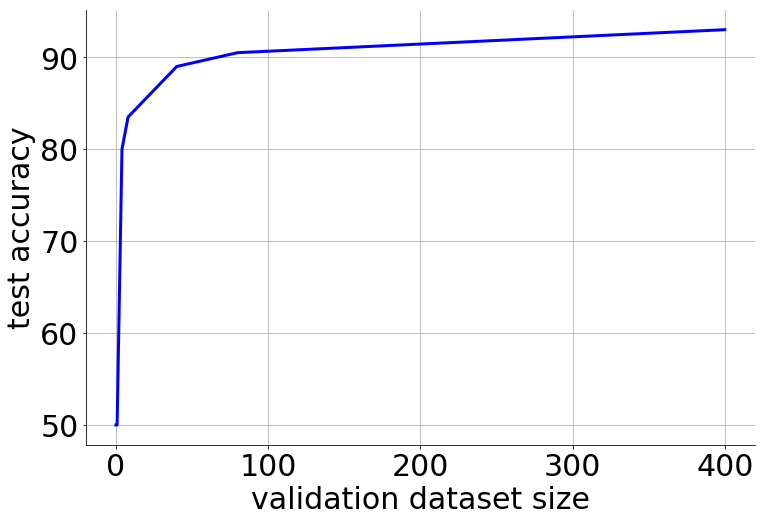

In [18]:
p_val = vp_list
plot_array = [] 
for i, j in enumerate(p_val):
    plot_array.append(temp[i][0])

plt.plot(np.array(p_val)*800, plot_array, 'b-', linewidth=3)
axes = plt.gca()
axes.tick_params(axis="x", labelsize=30)
axes.tick_params(axis="y", labelsize=30)
axes.spines["right"].set_visible(False)
axes.spines["top"].set_visible(False)
axes = plt.gca()
axes.tick_params(axis="x", labelsize=30)
axes.tick_params(axis="y", labelsize=30)
plt.grid(True)
plt.xlabel('validation dataset size', fontsize=30)
plt.ylabel('test accuracy', fontsize=30)
plt.show()